# Parte 1 Problema 1 b


In [8]:
import random as rnd
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neural_network import MLPClassifier


In [9]:
f = 100 #factor_escala = 100
n_samples = 1000

a = np.array([1, 1, 1, 1,
              1, 0, 0, 1,
              1, 0, 0, 1,
              1, 1, 1, 1])

b = np.array([1, 0, 0, 1,
              0, 1, 1, 0,
              0, 1, 1, 0,
              1, 0, 0, 1])

c = np.array([1, 0, 1, 0,
              0, 1, 0, 1,
              1, 0, 1, 0,
              0, 1, 0, 1])

d = np.array([1, 0, 1, 0,
              1, 0, 1, 0,
              1, 0, 1, 0,
              1, 0, 1, 0])

x = np.concatenate([[a],  [b],       [c],       [d]]*f)
y = np.array([[1,0,0,0], [0,1,0,0], [0,0,1,0], [0,0,0,1]]*f)

print(len(x))
print(len(y))

400
400


In [10]:
# criar amostras que faltam para ter um dataset de tamanho a n_samples
for i in range(n_samples - len(x)):
        x = np.append(x, [[rnd.randint(0, 1) for i in range(16)]], axis=0)
        y = np.append(y, [[0, 0, 0, 0]], axis=0)
        
        
        
print(len(x))
print(len(y))

1000
1000


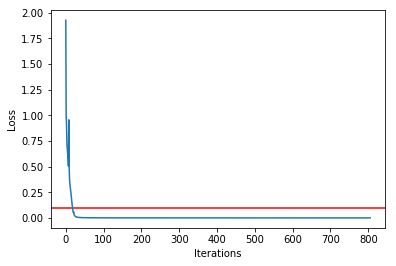

In [11]:
model = MLPClassifier(activation='relu',  #relu logistic tanh identity
                     solver='sgd',
                     max_iter=30000, 
                     hidden_layer_sizes=(32,4),
                     learning_rate_init=0.5,
                     shuffle=True,
                     momentum=0.5,
                     tol=0.000001,
                     n_iter_no_change=500).fit(x, y)


plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.axhline(y=0.1, color='r', linestyle='-')
plt.plot(model.loss_curve_)
plt.show()

In [ ]:
mlp = MLPClassifier(solver='sgd',
                    max_iter=30000,
                    shuffle=True,
                    tol=0.000001,
                    n_iter_no_change=500).fit(x, y)
mlp_params = {
    "hidden_layer_sizes":[(32, 8), (32, 16)],
    'learning_rate_init': [0.5, 0.8, 1, 1.5], 
    "activation": ["logistic","relu"],
    "momentum": [0.3, 0.5, 0.7]
}

mlp_cv = GridSearchCV(mlp, mlp_params, verbose=1).fit(x, y)

# optimum param
print("\n The best estimator across ALL searched params:\n",mlp_cv.best_estimator_)
print("\n The best score across ALL searched params:\n",mlp_cv.best_score_)
print("\n The best parameters across ALL searched params:\n",mlp_cv.best_params_)

In [1]:
ranking = mlp_cv.cv_results_['rank_test_score']

df = pd.DataFrame(list(mlp_cv.cv_results_['params']))
df['Ranking'] = ranking
# The sorting is done based on the F values of the models.
sorting = np.argsort(mlp_cv.cv_results_['rank_test_score'])

# Sort the lines based on the ranking of the models
df_final = df.iloc[sorting]
df_final.head(5)

NameError: name 'mlp_cv' is not defined

In [ ]:
# Model tuning
model = MLPClassifier(activation='relu',  #relu logistic tanh identity
                         solver='sgd',
                         max_iter=30000, 
                         hidden_layer_sizes=(32,8),
                         learning_rate_init=0.5,
                         shuffle=True,
                         momentum=0.5,
                         tol=0.000001,
                         n_iter_no_change=500).fit(x, y)

# Score
print("Score:", model.score(x, y)*100)
print("Prever o padrao A:", model.predict([x[0]]), np.array_equal(model.predict([x[0]]), np.array([[1, 0, 0, 0]])))
print("Prever o padrao B:", model.predict([x[1]]), np.array_equal(model.predict([x[1]]), np.array([[0, 1, 0, 0]])))
print("Prever o padrao C:", model.predict([x[2]]), np.array_equal(model.predict([x[2]]), np.array([[0, 0, 1, 0]])))
print("Prever o padrao D:", model.predict([x[3]]), np.array_equal(model.predict([x[3]]), np.array([[0, 0, 0, 1]])))

In [6]:
#model tuning
for i in range(10):
    model = MLPClassifier(activation='relu',  #relu logistic tanh identity
                         solver='sgd',
                         max_iter=30000, 
                         hidden_layer_sizes=(32,8),
                         learning_rate_init=0.5,
                         shuffle=True,
                         momentum=0.5,
                         tol=0.000001,
                         n_iter_no_change=500).fit(x, y)
    # Score
    print("Score:", model.score(x, y)*100)
    print("Prever o padrao A:", model.predict([x[0]]), np.array_equal(model.predict([x[0]]), np.array([[1, 0, 0, 0]])))
    print("Prever o padrao B:", model.predict([x[1]]), np.array_equal(model.predict([x[1]]), np.array([[0, 1, 0, 0]])))
    print("Prever o padrao C:", model.predict([x[2]]), np.array_equal(model.predict([x[2]]), np.array([[0, 0, 1, 0]])))
    print("Prever o padrao D:", model.predict([x[3]]), np.array_equal(model.predict([x[3]]), np.array([[0, 0, 0, 1]])))
    

1.0
Prever o padrao A: [[1 0 0 0]] True
Prever o padrao B: [[0 1 0 0]] True
Prever o padrao C: [[0 0 1 0]] True
Prever o padrao D: [[0 0 0 1]] True



1.0
Prever o padrao A: [[1 0 0 0]] True
Prever o padrao B: [[0 1 0 0]] True
Prever o padrao C: [[0 0 1 0]] True
Prever o padrao D: [[0 0 0 1]] True



1.0
Prever o padrao A: [[1 0 0 0]] True
Prever o padrao B: [[0 1 0 0]] True
Prever o padrao C: [[0 0 1 0]] True
Prever o padrao D: [[0 0 0 1]] True



1.0
Prever o padrao A: [[1 0 0 0]] True
Prever o padrao B: [[0 1 0 0]] True
Prever o padrao C: [[0 0 1 0]] True
Prever o padrao D: [[0 0 0 1]] True



1.0
Prever o padrao A: [[1 0 0 0]] True
Prever o padrao B: [[0 1 0 0]] True
Prever o padrao C: [[0 0 1 0]] True
Prever o padrao D: [[0 0 0 1]] True



1.0
Prever o padrao A: [[1 0 0 0]] True
Prever o padrao B: [[0 1 0 0]] True
Prever o padrao C: [[0 0 1 0]] True
Prever o padrao D: [[0 0 0 1]] True



1.0
Prever o padrao A: [[1 0 0 0]] True
Prever o padrao B: [[0 1 0 0]] True
Prever o padrao C:

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(32,4),
                      learning_rate_init=0.1,
                      max_iter=1000,
                      activation='logistic',
                      solver='sgd').fit(x,y)


print("Prever o padrao A:", model.predict([x[0]]), np.array_equal(model.predict([x[0]]), np.array([[1, 0, 0, 0]])))
print("Prever o padrao B:", model.predict([x[1]]), np.array_equal(model.predict([x[1]]), np.array([[0, 1, 0, 0]])))
print("Prever o padrao C:", model.predict([x[2]]), np.array_equal(model.predict([x[2]]), np.array([[0, 0, 1, 0]])))
print("Prever o padrao D:", model.predict([x[3]]), np.array_equal(model.predict([x[3]]), np.array([[0, 0, 0, 1]])))

# Score
print("Score:", model.score(x, y)*100)